In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy
import matplotlib.pyplot as plt

import sys
sys.path.append('../src/')
from methods import * 
from GHA import GHA

In [3]:
ds = 128
n_input = 2
n_features = 2
data=np.random.normal(loc=6, scale=1, size=(ds,n_input))
data[...,1] = 2*data[...,0] + data[...,1]

#data=np.concatenate([data,np.random.normal(loc=(10,4),scale=1,size=(ds,n_input))])

In [4]:
lr=0.1
loc=0.0
scale=0.1
lr_incr=1
gha = GHA(n_input,n_features,lr,loc,scale,lr_incr)

In [5]:
U,S,V = svd(data.copy())
print("Sangers initial kernel: \n", np.around(gha._W, decimals=3))
print("svd_U: \n", np.around(U, decimals=2))
print("svd_S: \n", np.around(S, decimals=2))
print("svd_V: \n", np.around(V, decimals=4))
print("svd_V/S \n", np.around(U/S, decimals=2))

Sangers initial kernel: 
 [[ 0.015 -0.003]
 [ 0.048 -0.058]]
svd_U: 
 [[-0.37 -0.93]
 [-0.93  0.37]]
svd_S: 
 [6.02 0.17]
svd_V: 
 [[-0.3691 -0.9294]
 [-0.9294  0.3691]]
svd_V/S 
 [[-0.06 -5.38]
 [-0.15  2.14]]


In [6]:
mb_size = 128
epochs = 1000
lr_update_freq = 4

for i in tqdm.trange(epochs):
    for j in range(int(data.shape[0] / mb_size)):
        mb = data[j * mb_size : (j + 1) * mb_size]
        gha.train_step(mb)
        if ((i*int(data.shape[0] / mb_size) + j) % lr_update_freq) == 0:
            gha.update_lr() # convergence is guaranteed when lr follows a convergent power series
        print(np.around(gha._W,4))
        print(gha.lr)

  0%|          | 0/1000 [00:00<?, ?it/s]

[[ 0.0157 -0.0014]
 [ 0.0412 -0.0781]]
0.09090909090909091
[[ 0.0169  0.0009]
 [ 0.0306 -0.1076]]
0.09090909090909091
[[ 0.0185  0.0044]
 [ 0.0135 -0.1526]]
0.09090909090909091
[[ 0.0209  0.0098]
 [-0.0133 -0.2211]]
0.09090909090909091
[[ 0.0245  0.0183]
 [-0.0544 -0.3232]]
0.08333333333333333
[[ 0.0296  0.0303]
 [-0.11   -0.4563]]
0.08333333333333333
[[ 0.037   0.0484]
 [-0.183  -0.6237]]
0.08333333333333333
[[ 0.048   0.0756]
 [-0.2629 -0.7938]]
0.08333333333333333
[[ 0.0644  0.1163]
 [-0.3232 -0.903 ]]
0.07692307692307693
[[ 0.0866  0.1721]
 [-0.3453 -0.9247]]
0.07692307692307693
[[ 0.1182  0.2517]
 [-0.3504 -0.9174]]
0.07692307692307693
[[ 0.1616  0.3621]
 [-0.3467 -0.8987]]
0.07692307692307693
[[ 0.2178  0.5063]
 [-0.3337 -0.8632]]
0.07142857142857142
[[ 0.277   0.6604]
 [-0.3098 -0.8042]]
0.07142857142857142
[[ 0.3298  0.801 ]
 [-0.274  -0.7165]]
0.07142857142857142
[[ 0.361   0.8887]
 [-0.2321 -0.613 ]]
0.07142857142857142
[[ 0.3705  0.9204]
 [-0.1955 -0.5214]]
0.066666666666666

 23%|██▎       | 234/1000 [00:00<00:00, 1192.05it/s]


0.04
[[ 0.3691  0.9294]
 [-0.0602 -0.169 ]]
0.04
[[ 0.3691  0.9294]
 [-0.0597 -0.1677]]
0.038461538461538464
[[ 0.3691  0.9294]
 [-0.0592 -0.1665]]
0.038461538461538464
[[ 0.3691  0.9294]
 [-0.0587 -0.1653]]
0.038461538461538464
[[ 0.3691  0.9294]
 [-0.0583 -0.1641]]
0.038461538461538464
[[ 0.3691  0.9294]
 [-0.0578 -0.163 ]]
0.037037037037037035
[[ 0.3691  0.9294]
 [-0.0574 -0.1619]]
0.037037037037037035
[[ 0.3691  0.9294]
 [-0.057  -0.1608]]
0.037037037037037035
[[ 0.3691  0.9294]
 [-0.0566 -0.1598]]
0.037037037037037035
[[ 0.3691  0.9294]
 [-0.0562 -0.1588]]
0.03571428571428571
[[ 0.3691  0.9294]
 [-0.0558 -0.1579]]
0.03571428571428571
[[ 0.3691  0.9294]
 [-0.0554 -0.1569]]
0.03571428571428571
[[ 0.3691  0.9294]
 [-0.0551 -0.156 ]]
0.03571428571428571
[[ 0.3691  0.9294]
 [-0.0547 -0.1551]]
0.034482758620689655
[[ 0.3691  0.9294]
 [-0.0544 -0.1542]]
0.034482758620689655
[[ 0.3691  0.9294]
 [-0.054  -0.1534]]
0.034482758620689655
[[ 0.3691  0.9294]
 [-0.0537 -0.1526]]
0.0344827586206

0.014492753623188406
[[ 0.3691  0.9294]
 [-0.0337 -0.1068]]
0.014285714285714285
[[ 0.3691  0.9294]
 [-0.0337 -0.1067]]
0.014285714285714285
[[ 0.3691  0.9294]
 [-0.0336 -0.1066]]
0.014285714285714285
[[ 0.3691  0.9294]
 [-0.0336 -0.1065]]
0.014285714285714285
[[ 0.3691  0.9294]
 [-0.0335 -0.1064]]
0.014084507042253521
[[ 0.3691  0.9294]
 [-0.0334 -0.1063]]
0.014084507042253521
[[ 0.3691  0.9294]
 [-0.0334 -0.1062]]
0.014084507042253521
[[ 0.3691  0.9294]
 [-0.0333 -0.1061]]
0.014084507042253521
[[ 0.3691  0.9294]
 [-0.0333 -0.1059]]
0.013888888888888888
[[ 0.3691  0.9294]
 [-0.0332 -0.1058]]
0.013888888888888888
[[ 0.3691  0.9294]
 [-0.0332 -0.1057]]
0.013888888888888888
[[ 0.3691  0.9294]
 [-0.0331 -0.1056]]
0.013888888888888888
[[ 0.3691  0.9294]
 [-0.0331 -0.1055]]
0.0136986301369863
[[ 0.3691  0.9294]
 [-0.033  -0.1054]]
0.0136986301369863
[[ 0.3691  0.9294]
 [-0.033  -0.1053]]
0.0136986301369863
[[ 0.3691  0.9294]
 [-0.0329 -0.1052]]
0.0136986301369863
[[ 0.3691  0.9294]
 [-0.032

 55%|█████▍    | 547/1000 [00:00<00:00, 1441.97it/s]


0.01098901098901099
[[ 0.3691  0.9294]
 [-0.0299 -0.0997]]
0.01098901098901099
[[ 0.3691  0.9294]
 [-0.0299 -0.0996]]
0.01098901098901099
[[ 0.3691  0.9294]
 [-0.0298 -0.0996]]
0.01098901098901099
[[ 0.3691  0.9294]
 [-0.0298 -0.0995]]
0.010869565217391304
[[ 0.3691  0.9294]
 [-0.0297 -0.0994]]
0.010869565217391304
[[ 0.3691  0.9294]
 [-0.0297 -0.0994]]
0.010869565217391304
[[ 0.3691  0.9294]
 [-0.0297 -0.0993]]
0.010869565217391304
[[ 0.3691  0.9294]
 [-0.0296 -0.0992]]
0.010752688172043012
[[ 0.3691  0.9294]
 [-0.0296 -0.0992]]
0.010752688172043012
[[ 0.3691  0.9294]
 [-0.0296 -0.0991]]
0.010752688172043012
[[ 0.3691  0.9294]
 [-0.0295 -0.0991]]
0.010752688172043012
[[ 0.3691  0.9294]
 [-0.0295 -0.099 ]]
0.010638297872340427
[[ 0.3691  0.9294]
 [-0.0295 -0.0989]]
0.010638297872340427
[[ 0.3691  0.9294]
 [-0.0294 -0.0989]]
0.010638297872340427
[[ 0.3691  0.9294]
 [-0.0294 -0.0988]]
0.010638297872340427
[[ 0.3691  0.9294]
 [-0.0293 -0.0987]]
0.010526315789473686
[[ 0.3691  0.9294]
 [-

[[ 0.3691  0.9294]
 [-0.0237 -0.0903]]
0.00675675675675676
[[ 0.3691  0.9294]
 [-0.0237 -0.0903]]
0.00675675675675676
[[ 0.3691  0.9294]
 [-0.0237 -0.0902]]
0.00675675675675676
[[ 0.3691  0.9294]
 [-0.0237 -0.0902]]
0.00675675675675676
[[ 0.3691  0.9294]
 [-0.0236 -0.0902]]
0.006711409395973157
[[ 0.3691  0.9294]
 [-0.0236 -0.0901]]
0.006711409395973157
[[ 0.3691  0.9294]
 [-0.0236 -0.0901]]
0.006711409395973157
[[ 0.3691  0.9294]
 [-0.0236 -0.0901]]
0.006711409395973157
[[ 0.3691  0.9294]
 [-0.0236 -0.0901]]
0.006666666666666669
[[ 0.3691  0.9294]
 [-0.0235 -0.09  ]]
0.006666666666666669
[[ 0.3691  0.9294]
 [-0.0235 -0.09  ]]
0.006666666666666669
[[ 0.3691  0.9294]
 [-0.0235 -0.09  ]]
0.006666666666666669
[[ 0.3691  0.9294]
 [-0.0235 -0.09  ]]
0.006622516556291393
[[ 0.3691  0.9294]
 [-0.0235 -0.0899]]
0.006622516556291393
[[ 0.3691  0.9294]
 [-0.0234 -0.0899]]
0.006622516556291393
[[ 0.3691  0.9294]
 [-0.0234 -0.0899]]
0.006622516556291393
[[ 0.3691  0.9294]
 [-0.0234 -0.0899]]
0.006

 69%|██████▉   | 692/1000 [00:00<00:00, 1368.61it/s]

[[ 0.3691  0.9294]
 [-0.0221 -0.0883]]
0.005952380952380955
[[ 0.3691  0.9294]
 [-0.0221 -0.0883]]
0.005917159763313611
[[ 0.3691  0.9294]
 [-0.0221 -0.0883]]
0.005917159763313611
[[ 0.3691  0.9294]
 [-0.0221 -0.0882]]
0.005917159763313611
[[ 0.3691  0.9294]
 [-0.0221 -0.0882]]
0.005917159763313611
[[ 0.3691  0.9294]
 [-0.022  -0.0882]]
0.005882352941176472
[[ 0.3691  0.9294]
 [-0.022  -0.0882]]
0.005882352941176472
[[ 0.3691  0.9294]
 [-0.022  -0.0882]]
0.005882352941176472
[[ 0.3691  0.9294]
 [-0.022  -0.0881]]
0.005882352941176472
[[ 0.3691  0.9294]
 [-0.022  -0.0881]]
0.005847953216374271
[[ 0.3691  0.9294]
 [-0.022  -0.0881]]
0.005847953216374271
[[ 0.3691  0.9294]
 [-0.0219 -0.0881]]
0.005847953216374271
[[ 0.3691  0.9294]
 [-0.0219 -0.0881]]
0.005847953216374271
[[ 0.3691  0.9294]
 [-0.0219 -0.088 ]]
0.005813953488372095
[[ 0.3691  0.9294]
 [-0.0219 -0.088 ]]
0.005813953488372095
[[ 0.3691  0.9294]
 [-0.0219 -0.088 ]]
0.005813953488372095
[[ 0.3691  0.9294]
 [-0.0219 -0.088 ]]
0

 84%|████████▍ | 844/1000 [00:00<00:00, 1416.19it/s]

[[ 0.3691  0.9294]
 [-0.0191 -0.085 ]]
0.004608294930875577
[[ 0.3691  0.9294]
 [-0.0191 -0.085 ]]
0.004608294930875577
[[ 0.3691  0.9294]
 [-0.019  -0.085 ]]
0.004608294930875577
[[ 0.3691  0.9294]
 [-0.019  -0.085 ]]
0.0045871559633027525
[[ 0.3691  0.9294]
 [-0.019  -0.085 ]]
0.0045871559633027525
[[ 0.3691  0.9294]
 [-0.019  -0.085 ]]
0.0045871559633027525
[[ 0.3691  0.9294]
 [-0.019  -0.0849]]
0.0045871559633027525
[[ 0.3691  0.9294]
 [-0.019  -0.0849]]
0.0045662100456621
[[ 0.3691  0.9294]
 [-0.019  -0.0849]]
0.0045662100456621
[[ 0.3691  0.9294]
 [-0.0189 -0.0849]]
0.0045662100456621
[[ 0.3691  0.9294]
 [-0.0189 -0.0849]]
0.0045662100456621
[[ 0.3691  0.9294]
 [-0.0189 -0.0849]]
0.004545454545454545
[[ 0.3691  0.9294]
 [-0.0189 -0.0849]]
0.004545454545454545
[[ 0.3691  0.9294]
 [-0.0189 -0.0848]]
0.004545454545454545
[[ 0.3691  0.9294]
 [-0.0189 -0.0848]]
0.004545454545454545
[[ 0.3691  0.9294]
 [-0.0189 -0.0848]]
0.004524886877828055
[[ 0.3691  0.9294]
 [-0.0189 -0.0848]]
0.004

100%|██████████| 1000/1000 [00:00<00:00, 1395.49it/s]


[[ 0.3691  0.9294]
 [-0.0179 -0.0839]]
0.004184100418410043
[[ 0.3691  0.9294]
 [-0.0179 -0.0839]]
0.004184100418410043
[[ 0.3691  0.9294]
 [-0.0179 -0.0839]]
0.004166666666666668
[[ 0.3691  0.9294]
 [-0.0178 -0.0839]]
0.004166666666666668
[[ 0.3691  0.9294]
 [-0.0178 -0.0839]]
0.004166666666666668
[[ 0.3691  0.9294]
 [-0.0178 -0.0839]]
0.004166666666666668
[[ 0.3691  0.9294]
 [-0.0178 -0.0839]]
0.004149377593360998
[[ 0.3691  0.9294]
 [-0.0178 -0.0838]]
0.004149377593360998
[[ 0.3691  0.9294]
 [-0.0178 -0.0838]]
0.004149377593360998
[[ 0.3691  0.9294]
 [-0.0178 -0.0838]]
0.004149377593360998
[[ 0.3691  0.9294]
 [-0.0177 -0.0838]]
0.0041322314049586795
[[ 0.3691  0.9294]
 [-0.0177 -0.0838]]
0.0041322314049586795
[[ 0.3691  0.9294]
 [-0.0177 -0.0838]]
0.0041322314049586795
[[ 0.3691  0.9294]
 [-0.0177 -0.0838]]
0.0041322314049586795
[[ 0.3691  0.9294]
 [-0.0177 -0.0838]]
0.004115226337448562
[[ 0.3691  0.9294]
 [-0.0177 -0.0838]]
0.004115226337448562
[[ 0.3691  0.9294]
 [-0.0177 -0.0837

In [7]:
print("Sangers trained kernel: \n", np.around(gha._W, decimals=2))
gha.cma

Sangers trained kernel: 
 [[ 0.37  0.93]
 [-0.02 -0.08]]


array([ 6.00782724, 17.98946854])

<IPython.core.display.Javascript object>


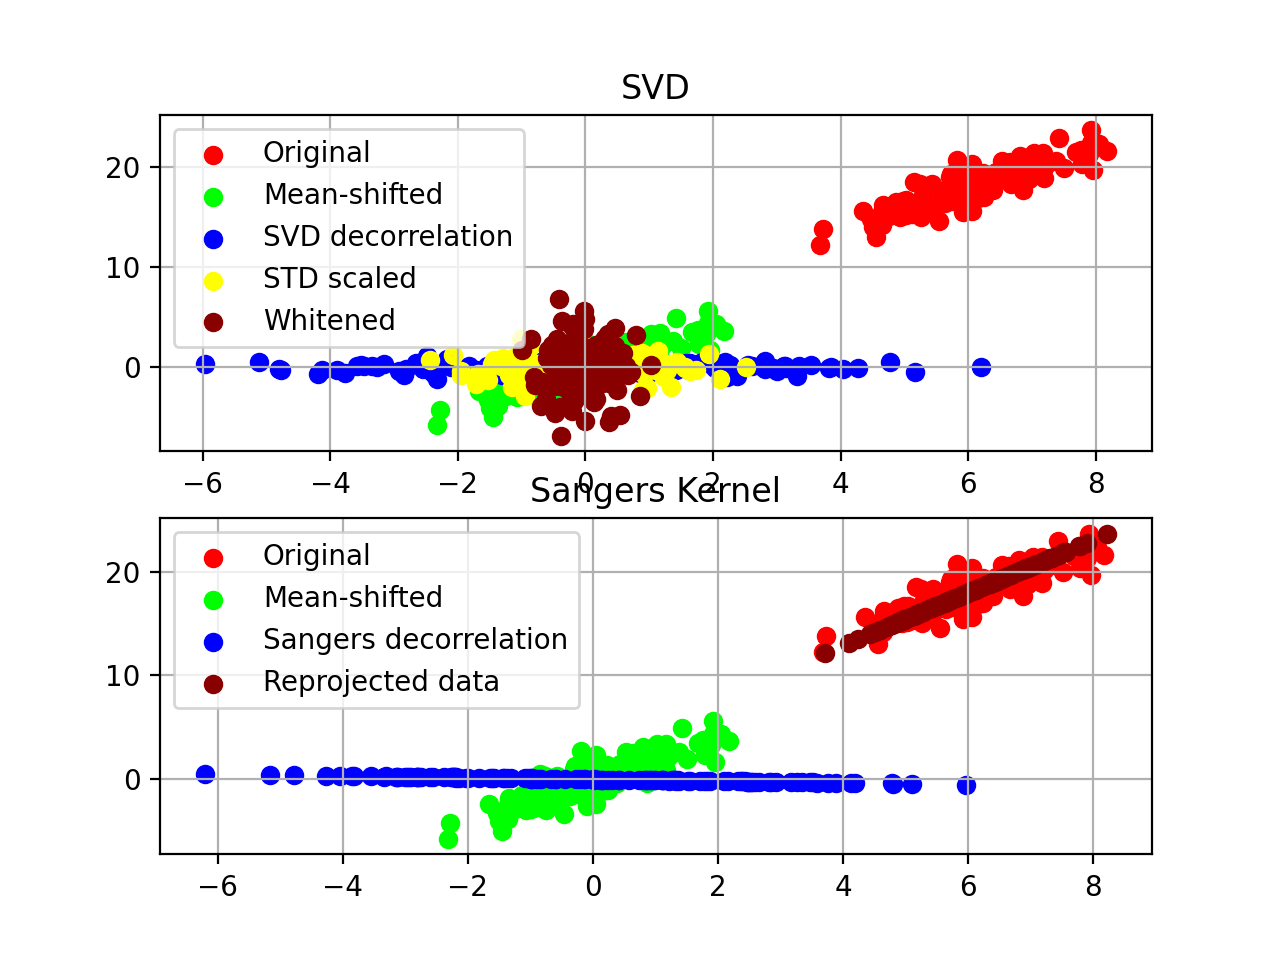

[0.40746608 2.40564351]


In [8]:
data_cpy = data.copy()

fig, ax = plt.subplots(2)
ax[0].scatter(data[...,0],data[...,1],c='#ff0000',label='Original')
data -= np.mean(data,axis=0)
ax[0].scatter(data[...,0],data[...,1],c='#00ff00',label='Mean-shifted')
data = np.dot(data,U)
ax[0].scatter(data[...,0],data[...,1],c='#0000ff',label='SVD decorrelation')
data1 = data.copy() / np.std(data,axis=0)
ax[0].scatter(data1[...,0],data1[...,1],c='#ffff00',label='STD scaled')
data /= S
print(np.std(data,axis=0))
ax[0].scatter(data[...,0],data[...,1],c='#880000',label='Whitened')
ax[0].set_title("SVD")
ax[0].legend()

data = data_cpy.copy()
ax[1].scatter(data[...,0],data[...,1],c='#ff0000',label='Original')
data -= np.mean(data,axis=0)
ax[1].scatter(data[...,0],data[...,1],c='#00ff00',label='Mean-shifted')
data = gha.forward(data)
ax[1].scatter(data[...,0],data[...,1],c='#0000ff',label='Sangers decorrelation')
#data *= np.std(data,axis=0)**2
#ax[1].scatter(data[...,0],data[...,1],c='#880000',label='Original')
data = gha.inverse(data) + np.mean(data_cpy,axis=0)
ax[1].scatter(data[...,0],data[...,1],c='#880000',label='Reprojected data')
ax[1].set_title("Sangers Kernel")
ax[1].legend()


ax[0].grid('on')
ax[1].grid('on')
fig.show()